In [1]:
import numpy as np 
import os
from PIL import Image
import matplotlib.pyplot as plt
import glob 
import os
from cmcrameri import cm

In [2]:

amplitudes = np.linspace(0, 1, 9)
amplitudes

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ])

In [3]:
current_defocus = '0.0'

In [4]:
saveplots = os.path.join('./', 'plots')
if os.path.isdir(saveplots) == False:
    os.makedirs(saveplots)

In [5]:
real_file_locations = '/media/maria/ESP/ExperimentalData'
real_file_start = 'ImageIndex'
look_for = os.path.join(real_file_locations, '*.jpg')
real_images = glob.glob(look_for)
# real_images

In [6]:
if real_file_start not in real_images[100]:
    print('ok')

In [7]:
real_intensity = []

for i in range(len(real_images)):
    name = real_images[i]
    if real_file_start in name:
        im = Image.open(name)
        intensity = np.asarray(im)
        av_insity = np.average(intensity)
        real_intensity.append(av_insity)    
        # print(av_insity)

In [8]:
n_averages = np.array(real_intensity)
mesan_intensity =  np.mean(n_averages)
print(mesan_intensity)

33.41695635958213


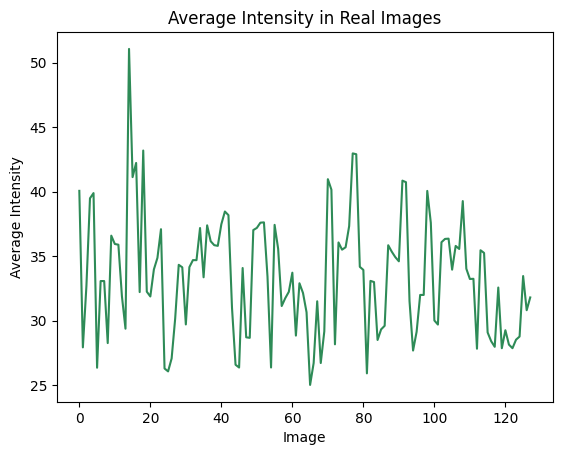

In [9]:
plt.xlabel('Image')
plt.ylabel('Average Intensity')
plt.title('Average Intensity in Real Images')
plt.plot(real_intensity, color='seagreen')

In [10]:
white_noise_std = 0.0

erica_location = f'/media/maria/MariaData/DatasetPostImageAberration/DoublePass_Mean0.03_STD0.02/ConeMosaic0/Session0/Images'
look_for = os.path.join(erica_location, '*.bmp')
erica_images = glob.glob(look_for)
print(len(erica_images))


96


In [11]:
erica_intensity = []

for i in range(len(erica_images)):
    name = erica_images[i]
    im = Image.open(name)
    intensity = np.asarray(im)
    av_insity = np.average(intensity)
    erica_intensity.append(av_insity)

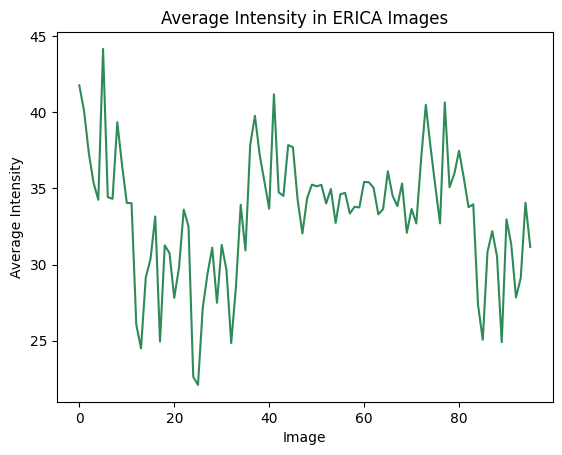

In [12]:
plt.xlabel('Image')
plt.ylabel('Average Intensity')
plt.title('Average Intensity in ERICA Images')
plt.plot(erica_intensity, color='seagreen')

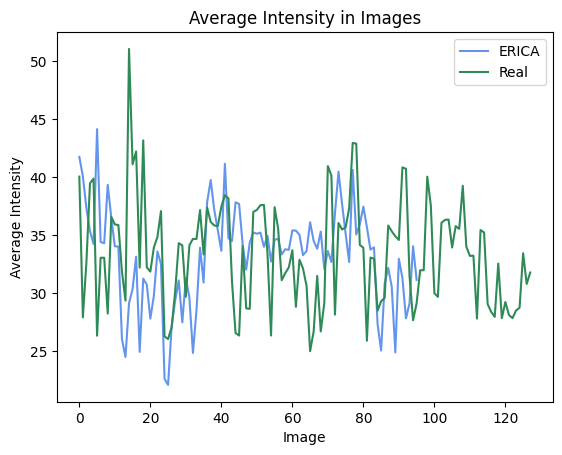

In [13]:
plt.xlabel('Image')
plt.ylabel('Average Intensity')
plt.title('Average Intensity in Images')
plt.plot(erica_intensity, color='cornflowerblue', label='ERICA')
plt.plot(real_intensity, color='seagreen', label='Real')
plt.legend(loc="upper right")

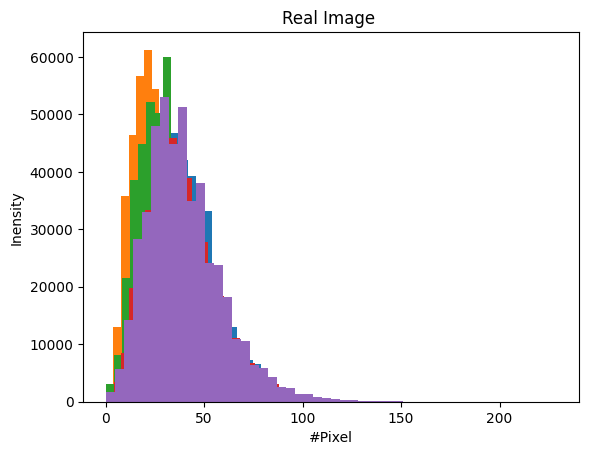

In [14]:
for i in range(5):
    name = real_images[i]
    if real_file_start in name:
        im = Image.open(name)
        intensity = np.asarray(im)
        plt.hist(intensity.flatten(), bins=50)
        plt.xlabel('#Pixel')
        plt.ylabel('Inensity')
        plt.title(f'Real Image ')
        # plt.savefig(f'RealPlot{i}.png')
        # plt.cla()
        # plt.clf()
        # plt.close()
fname = os.path.join(saveplots, 'RealHisto.png')
plt.savefig(fname)

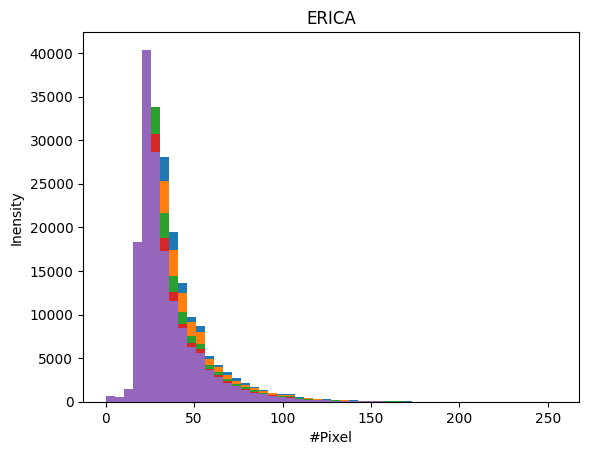

In [15]:
for i in range(5):
    name = erica_images[i]
    im = Image.open(name)
    intensity = np.asarray(im)
    plt.hist(intensity.flatten(), bins=50)
    plt.xlabel('#Pixel')
    plt.ylabel('Inensity')
    plt.title(f'ERICA')
    # plt.savefig(f'ERICAPlot{i}.png')
    # plt.cla()
    # plt.clf()
    # plt.close()
fname = os.path.join(saveplots, 'EricaHisto.png')
plt.savefig(fname)

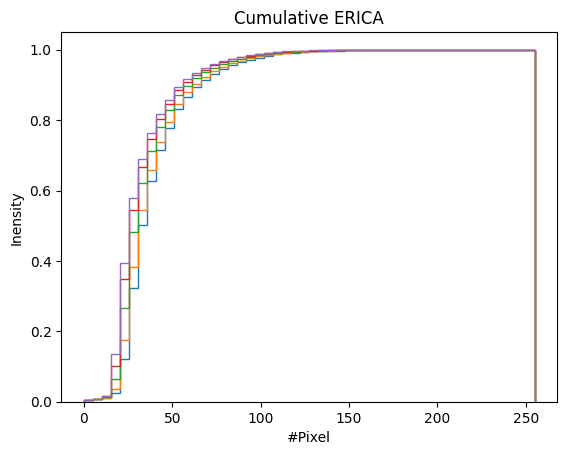

In [16]:
for i in range(5):
    name = erica_images[i]
    im = Image.open(name)
    intensity = np.asarray(im)
    plt.hist(intensity.flatten(), bins=50, cumulative=True, density=True, histtype="step")
    plt.xlabel('#Pixel')
    plt.ylabel('Inensity')
    plt.title(f'Cumulative ERICA')
    # plt.savefig(f'ERICAPlot{i}.png')
    # plt.cla()
    # plt.clf()
    # plt.close()
fname = os.path.join(saveplots, 'Cumulative_EricaHisto.png')
plt.savefig(fname)

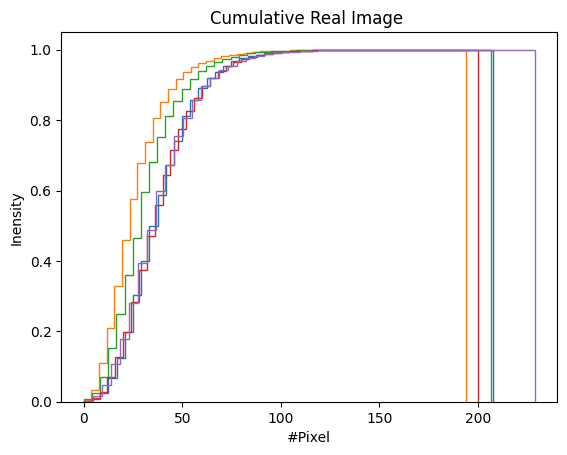

In [17]:
for i in range(5):
    name = real_images[i]
    if real_file_start in name:
        im = Image.open(name)
        intensity = np.asarray(im)
        plt.hist(intensity.flatten(), bins=50, cumulative=True,  density=True, histtype="step")
        plt.xlabel('#Pixel')
        plt.ylabel('Inensity')
        plt.title(f'Cumulative Real Image ')
        # plt.savefig(f'RealPlot{i}.png')
        # plt.cla()
        # plt.clf()
        # plt.close()

fname = os.path.join(saveplots, 'CumulativeRealHisto.png')
plt.savefig(fname)

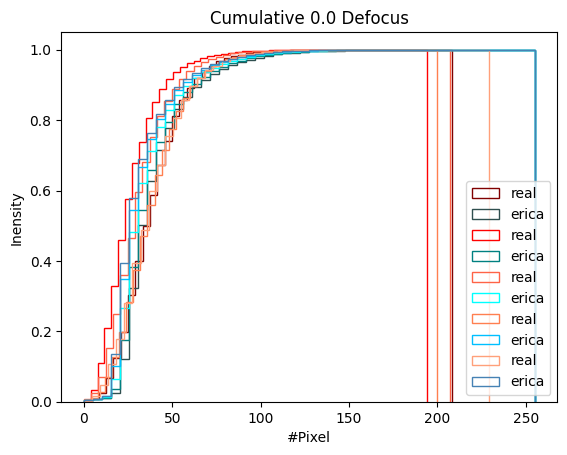

In [18]:
erica_cols = ['darkslategrey', 'teal', 'cyan', 'deepskyblue', 'steelblue']
real_cols = ['maroon','red','tomato','coral','lightsalmon']


for i in range(5):
    name = real_images[i]
    if real_file_start in name:
        im = Image.open(name)
        intensity = np.asarray(im)
        plt.hist(intensity.flatten(), bins=50, color=real_cols[i], cumulative=True,  density=True, histtype="step", label='real')
        plt.xlabel('#Pixel')
        plt.ylabel('Inensity')
        plt.title(f'Cumulative Real ')

    name = erica_images[i]
    im = Image.open(name)
    intensity = np.asarray(im)
    plt.hist(intensity.flatten(), bins=50, color= erica_cols[i], cumulative=True, density=True, histtype="step", label='erica')
    plt.xlabel('#Pixel')
    plt.ylabel('Inensity')
    plt.title(f'Cumulative {current_defocus} Defocus')
    plt.legend(loc="lower right")


fname = os.path.join(saveplots, f'CombinedCumulativeHisto_{current_defocus}.png')
plt.savefig(fname)

In [19]:
# Average Cumulative Histogram 
# For every erica point, get one average point and plot that 

all_flattened = []
for i in range(10):
    name = erica_images[i]
    im = Image.open(name)
    intensity = np.asarray(im)
    flattened = intensity.flatten()
    all_flattened.append(flattened)

np_flat = np.array(all_flattened)
print(np_flat)
np_flat.shape
av_erica = np.average(np_flat, axis=1)
av_erica

[[ 0  2  6 ... 24 20 17]
 [ 0  3  7 ... 24 29 28]
 [ 0  2  6 ... 16 15 12]
 ...
 [ 0  2  6 ... 22 19 17]
 [ 0  3  7 ... 23 21 18]
 [ 0  3  7 ... 29 39 49]]


array([41.76558736, 40.09030803, 37.31778228, 35.36096945, 34.2548242 ,
       44.15855159, 34.429008  , 34.31660345, 39.34822664, 36.53659474])

In [20]:
im = Image.open(real_images[3])
print(im.size)
intensity = np.asarray(im)
flattened = intensity.flatten()
flattened.shape
print(str(350 * 430 * 3))

(358, 436)
451500


In [21]:
num_images = 10

all_flattened = np.zeros(shape=(num_images, 451500))

for i in range(num_images):
    try:
        name = real_images[i]
        if real_file_start in name:
            im = Image.open(name)
            intensity = np.asarray(im)
            # print(intensity.shape)
            intensity = intensity[:430, :350, :]
            # print(intensity.shape)
            flattened = intensity.flatten()
            # print(flattened.shape)
            all_flattened[i] = flattened
    except Exception as e:
        print(e.with_traceback())
        print(f"FAILED {im.size}")
print(all_flattened)

av_real = np.average(all_flattened, axis=1)
av_real

[[29. 31. 28. ... 27. 29. 26.]
 [ 9. 11.  8. ... 30. 32. 29.]
 [35. 37. 34. ... 26. 28. 25.]
 ...
 [13. 15. 12. ... 23. 25. 22.]
 [23. 25. 22. ... 17. 19. 16.]
 [29. 31. 28. ... 24. 26. 23.]]


array([40.1542237 , 27.95428128, 32.73265559, 39.39988926, 39.82094795,
       26.30867774, 33.13192027, 33.15459579, 28.33138427, 36.66774308])

Text(0.5, 1.0, 'Cumulative Average across points - 0 Defocus')

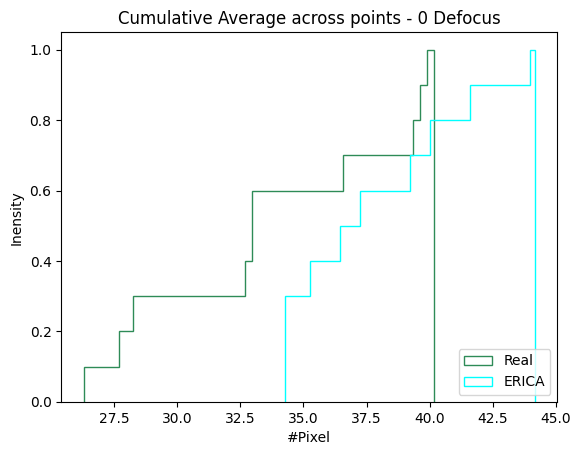

In [22]:
plt.hist(av_real.flatten(), bins=50, color='seagreen', cumulative=True, density=True, histtype="step", label='Real')
plt.hist(av_erica.flatten(), bins=50, color='cyan', cumulative=True, density=True, histtype="step", label='ERICA')
plt.xlabel('#Pixel')
plt.ylabel('Inensity')
plt.legend(loc="lower right")
plt.title('Cumulative Average across points - 0 Defocus')


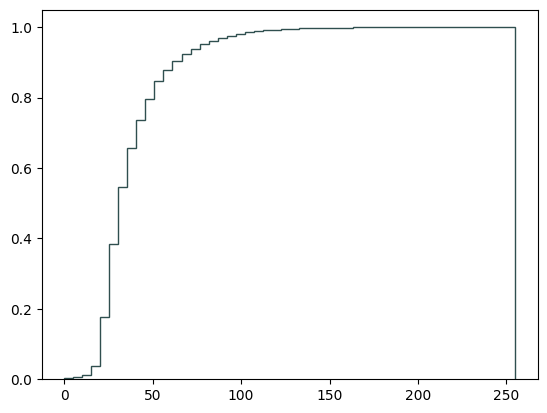

In [23]:
# Corrected cumulative histogram 

# Steps: Take the real cumulative histo 

name = erica_images[1]
im = Image.open(name)
intensity = np.asarray(im)
x = plt.hist(intensity.flatten(), bins=50, color= erica_cols[0], cumulative=True, density=True, histtype="step", label='erica')


In [24]:
intensity

array([[ 0,  3,  7, ...,  1,  1,  1],
       [ 2, 10, 19, ...,  7,  7,  7],
       [ 4, 14, 27, ..., 13, 14, 16],
       ...,
       [ 6, 20, 36, ..., 22, 26, 25],
       [12, 36, 65, ..., 26, 30, 30],
       [16, 48, 86, ..., 24, 29, 28]], dtype=uint8)

In [25]:
x[0]

array([0.00429886, 0.00748296, 0.01105146, 0.03664599, 0.17627877,
       0.38295064, 0.54518605, 0.65698837, 0.73693686, 0.79555123,
       0.84693891, 0.8784724 , 0.90378504, 0.92350469, 0.93902798,
       0.95163626, 0.96166265, 0.96928656, 0.97571883, 0.98079289,
       0.98568115, 0.98869228, 0.99115883, 0.99308083, 0.99461201,
       0.99581006, 0.99685434, 0.99761032, 0.99817411, 0.99857132,
       0.99896853, 0.9992312 , 0.99940418, 0.99955794, 0.99967326,
       0.99973092, 0.99977577, 0.99981421, 0.99985905, 0.99988468,
       0.99991031, 0.99992953, 0.99996156, 0.99996156, 0.99997437,
       0.99998078, 0.99998078, 0.99999359, 0.99999359, 1.        ])

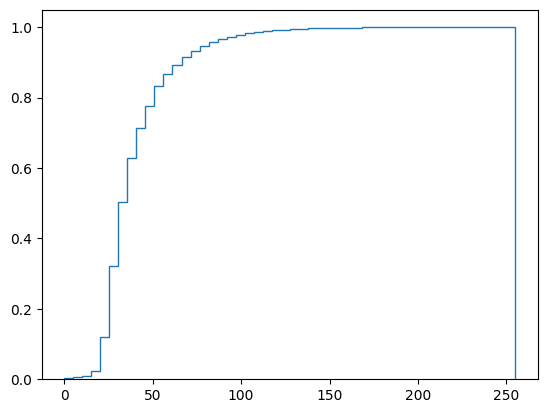

In [26]:
x_coords = []
y_coords = []

for i in range(1):
    name = erica_images[i]
    im = Image.open(name)
    intensity = np.asarray(im)
    curr_points = plt.hist(intensity.flatten(), bins=50, cumulative=True, density=True, histtype="step", label='erica')
    x_coords.append(curr_points[1])
    y_coords.append(curr_points[0])

In [27]:
curr_points

(array([0.00408103, 0.0070409 , 0.01007124, 0.02369817, 0.12022705,
        0.32306776, 0.50263954, 0.6272167 , 0.71474425, 0.77716416,
        0.83273538, 0.86635744, 0.89321408, 0.91472759, 0.93205115,
        0.94602404, 0.95690892, 0.96539132, 0.97211189, 0.97776254,
        0.98327866, 0.98680872, 0.98948029, 0.99165855, 0.99352929,
        0.99495157, 0.99606632, 0.99702091, 0.99770002, 0.99821895,
        0.99868664, 0.99901978, 0.99919917, 0.99939137, 0.9995195 ,
        0.99962841, 0.99974373, 0.99979499, 0.99984624, 0.99987187,
        0.9999039 , 0.99991671, 0.99995515, 0.99995515, 0.99995515,
        0.99996797, 0.99996797, 0.99998078, 0.99998719, 1.        ]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9

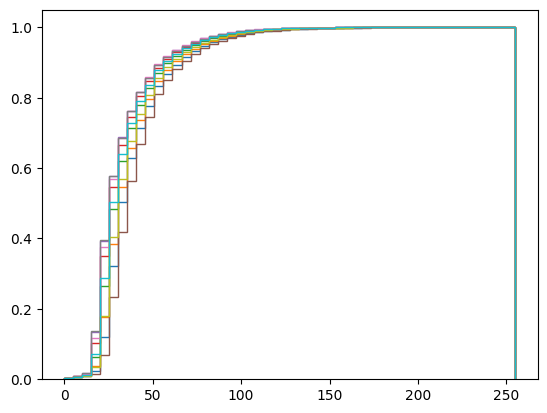

In [28]:
x_coords = []
y_coords = []

for i in range(10):
    name = erica_images[i]
    im = Image.open(name)
    intensity = np.asarray(im)
    curr_points = plt.hist(intensity.flatten(), bins=50, cumulative=True, density=True, histtype="step", label='erica')
    x_coords.append(curr_points[0])
    y_coords.append(curr_points[1])

In [29]:
curr_points[1]

array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
        45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
        91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
       137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
       183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
       229.5, 234.6, 239.7, 244.8, 249.9, 255. ])

In [30]:
average_x = np.average(x_coords, axis=1)
average_y = np.average(y_coords, axis = 1)

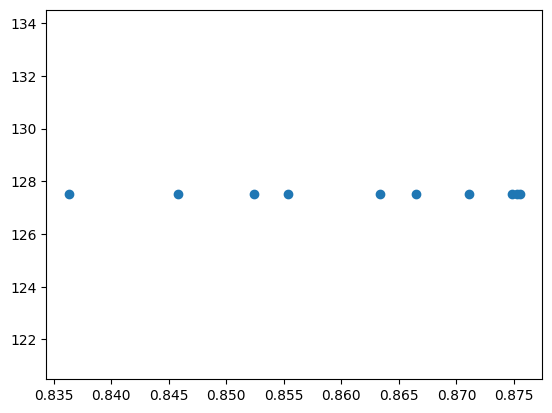

In [31]:
plt.scatter(average_x, average_y)

Text(0, 0.5, 'Normalised intensity ')

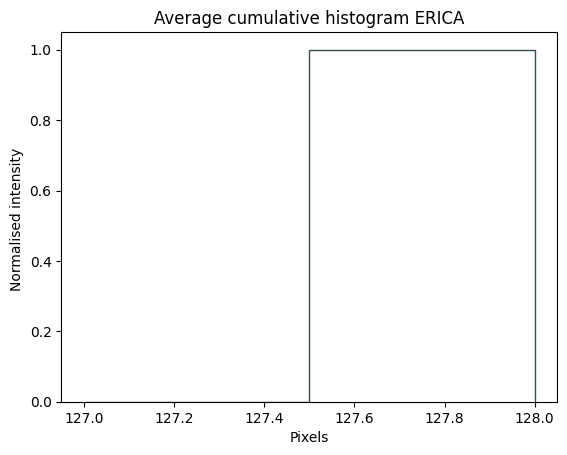

In [32]:
plt.hist(average_y, bins=50, color= erica_cols[0], cumulative=True, density=True, histtype="step", label='erica')
plt.title('Average cumulative histogram ERICA')
plt.xlabel('Pixels')
plt.ylabel('Normalised intensity ')

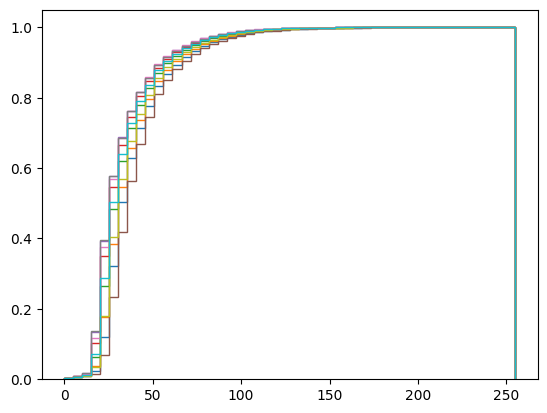

In [33]:
# ok fuck, how do we do this ........cdaso;khcf[ihjrwi]p
x_coords = np.zeros((10, 51))
y_coords = np.zeros((10, 50))

for i in range(10):
    name = erica_images[i]
    im = Image.open(name)
    intensity = np.asarray(im)
    curr_points = plt.hist(intensity.flatten(), bins=50, cumulative=True, density=True, histtype="step", label='erica')
    # x_coords.append(curr_points[0])
    # y_coords.append(curr_points[1])

    y_coords[i,:] = curr_points[0]
    x_coords[i, :] = curr_points[1]


In [34]:
x_coords

array([[  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ],
       [  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ],
       [  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117

In [35]:
np.unique(x_coords)

array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
        45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
        91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
       137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
       183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
       229.5, 234.6, 239.7, 244.8, 249.9, 255. ])

In [36]:
y_coords.shape

(10, 50)

In [37]:
# so for every non unique element, we tkae an average 

np.max(x_coords) 

255.0

In [38]:
# what i actually have to do 
# gp through every x 
# find the ys 
# average them 
unique_x_coords = np.unique(x_coords)

x = []
y = []

for i in range(np.unique(x_coords).size):
    curr_x = unique_x_coords[i]
    # print(curr_x)

    # find in x array 
    curr_x_loc = np.where(x_coords == curr_x)
    # print(curr_x_loc)

    all_values = []
    for j in range(curr_x_loc[0].size):
        x_idx = curr_x_loc[0][j]
        # print(x_idx)

        y_idx = curr_x_loc[1][j]
        # print(y_idx)

        if y_idx == 50:
            continue 

        try:
            y_value = y_coords[x_idx][y_idx]
        except:
            print(x_idx, y_idx)
  

        all_values.append(y_value)
    np_all_vals = np.array(all_values)
    av_vals = np.average(np_all_vals)
    # print(type(av_vals)

    x.append(curr_x)
    y.append(av_vals)


/home/maria/anaconda3/envs/ERICA/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/maria/anaconda3/envs/ERICA/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


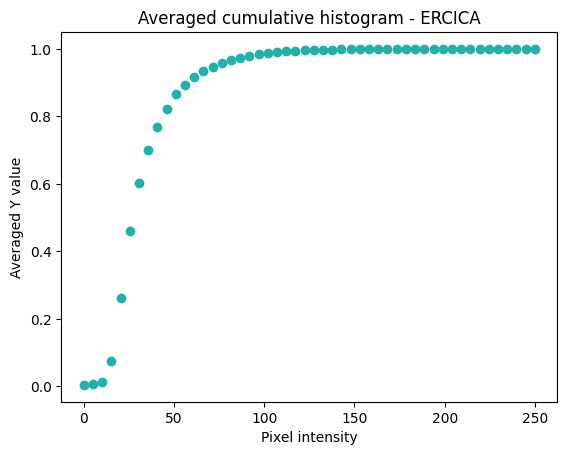

In [39]:
plt.scatter(x, y, color='lightseagreen')
plt.xlabel('Pixel intensity')
plt.ylabel('Averaged Y value')
plt.title('Averaged cumulative histogram - ERCICA')
fname = os.path.join(saveplots, 'AveragedEricaCumulative.png')
plt.savefig(fname)

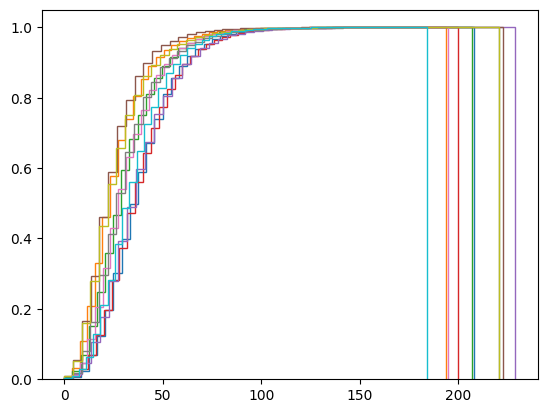

In [40]:
x_coords_real = np.zeros((10, 51))
y_coords_real = np.zeros((10, 50))

for i in range(10):
    name = real_images[i]
    if real_file_start in name:
        im = Image.open(name)
        intensity = np.asarray(im)
        curr_points = plt.hist(intensity.flatten(), bins=50, cumulative=True, density=True, histtype="step", label='erica')

        
        y_coords_real[i,:] = curr_points[0]
        x_coords_real[i, :] = curr_points[1]

unique_x_coord_real = np.unique(x_coords_real)

x_real = []
y_real = []

for i in range(np.unique(x_coords_real).size):
    curr_x = unique_x_coord_real[i]
    # print(curr_x)

    # find in x array 
    curr_x_loc = np.where(x_coords_real == curr_x)
    # print(curr_x_loc)

    all_values = []
    for j in range(curr_x_loc[0].size):
        x_idx = curr_x_loc[0][j]
        # print(x_idx)

        y_idx = curr_x_loc[1][j]
        # print(y_idx)

        if y_idx == 50:
            continue 

        try:
            y_value = y_coords_real[x_idx][y_idx]
        except:
            print(x_idx, y_idx)
  

        all_values.append(y_value)
    np_all_vals = np.array(all_values)
    av_vals = np.average(np_all_vals)
    # print(type(av_vals)

    x_real.append(curr_x)
    y_real.append(av_vals)

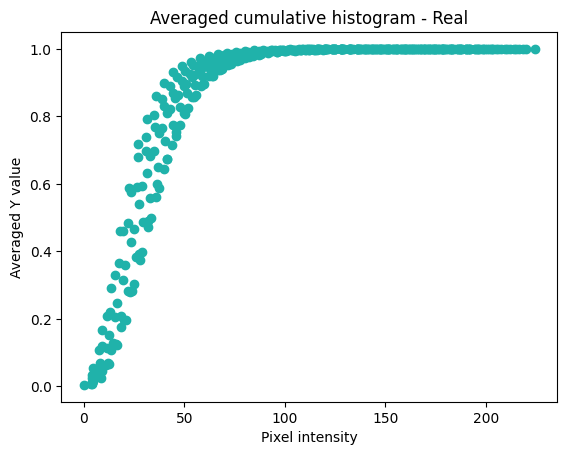

In [41]:
plt.scatter(x_real, y_real, color='lightseagreen')
plt.xlabel('Pixel intensity')
plt.ylabel('Averaged Y value')
plt.title('Averaged cumulative histogram - Real')
fname = os.path.join(saveplots, 'AveragedRealCumulative.png')
plt.savefig(fname)

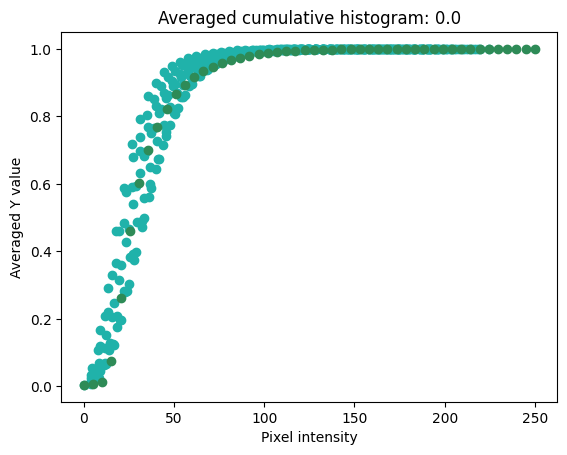

In [42]:
plt.scatter(x_real, y_real, color='lightseagreen', label ='Real')
plt.scatter(x, y, color='seagreen', label='ERICA')
plt.xlabel('Pixel intensity')
plt.ylabel('Averaged Y value')
plt.title(f'Averaged cumulative histogram: {current_defocus}')
fname = os.path.join(saveplots, f'AveragedCombinedCumulative_{current_defocus}.png')
plt.savefig(fname)

In [43]:
new_x_range = np.linspace(0, 255, 256, dtype='int')
new_x_range

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

(array([0.00408103, 0.0070409 , 0.01007124, 0.02369817, 0.12022705,
       0.32306776, 0.50263954, 0.6272167 , 0.71474425, 0.77716416,
       0.83273538, 0.86635744, 0.89321408, 0.91472759, 0.93205115,
       0.94602404, 0.95690892, 0.96539132, 0.97211189, 0.97776254,
       0.98327866, 0.98680872, 0.98948029, 0.99165855, 0.99352929,
       0.99495157, 0.99606632, 0.99702091, 0.99770002, 0.99821895,
       0.99868664, 0.99901978, 0.99919917, 0.99939137, 0.9995195 ,
       0.99962841, 0.99974373, 0.99979499, 0.99984624, 0.99987187,
       0.9999039 , 0.99991671, 0.99995515, 0.99995515, 0.99995515,
       0.99996797, 0.99996797, 0.99998078, 0.99998719, 1.        ]), array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
        45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
        91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
       137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
       183.6, 188.7, 193.8, 198.9, 204. , 209.1

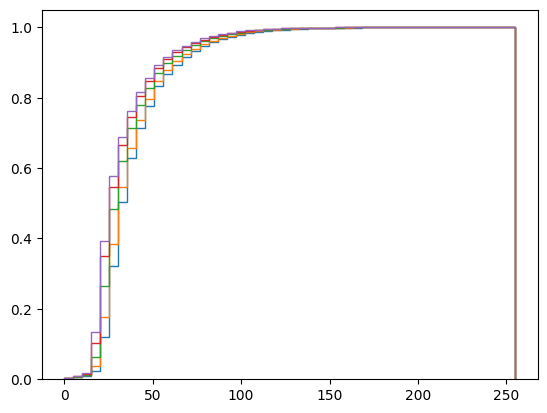

In [44]:
all_y_values = np.zeros((5, 256))

curr_y = None 
curr_x = None
for i in range(5):
    name = erica_images[i]
    im = Image.open(name)
    intensity = np.asarray(im)
    curr_points = plt.hist(intensity.flatten(), bins=50, cumulative=True, density=True, histtype="step", label='erica')
    print(curr_points)

    curr_y = curr_points[0]
    curr_x = curr_points[1]

    print(len(curr_x[:-1]), len(curr_y))

    new_y  = np.interp(new_x_range, curr_x[:-1], curr_y)
    # print(new_y)
    all_y_values[i,:] = new_y


In [45]:
all_y_values.shape

(5, 256)

In [46]:
averaged_y = all_y_values.mean(axis=0)
averaged_y.shape

(256,)

In [47]:
averaged_y

array([0.00435395, 0.00501673, 0.0056795 , 0.00634227, 0.00700505,
       0.00766782, 0.00871703, 0.00980917, 0.01090132, 0.01199346,
       0.0130856 , 0.02256337, 0.03413753, 0.0457117 , 0.05728586,
       0.06886002, 0.09825425, 0.13528565, 0.17231705, 0.20934845,
       0.24637985, 0.28487558, 0.32434753, 0.36381948, 0.40329143,
       0.44276338, 0.47643707, 0.5043125 , 0.53218793, 0.56006335,
       0.58793878, 0.61224417, 0.63119452, 0.65014487, 0.66909521,
       0.68804556, 0.70537238, 0.718911  , 0.73244962, 0.74598824,
       0.75952685, 0.77233868, 0.78224335, 0.79214802, 0.80205269,
       0.81195736, 0.82174776, 0.83050979, 0.83927181, 0.84803384,
       0.85679586, 0.86555789, 0.87102941, 0.87650094, 0.88197246,
       0.88744399, 0.89291551, 0.89739099, 0.9017558 , 0.9061206 ,
       0.91048541, 0.91485022, 0.91845829, 0.92187718, 0.92529606,
       0.92871495, 0.93213383, 0.93506416, 0.9377851 , 0.94050603,
       0.94322697, 0.94594791, 0.94834505, 0.95052632, 0.95270

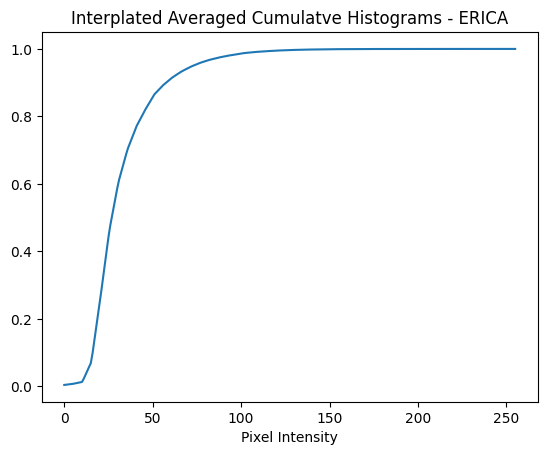

In [48]:
plt.plot(new_x_range, averaged_y)
plt.title('Interplated Averaged Cumulatve Histograms - ERICA')
plt.xlabel('Pixel Intensity')
plt.ylabel('')

fname = os.path.join(saveplots, f'InterpolatedERICA-{current_defocus}.png')

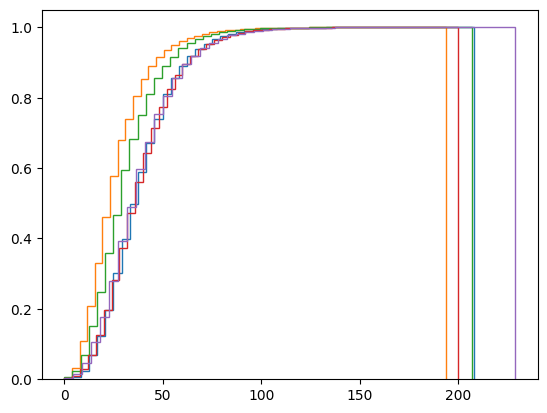

In [49]:



real_y_values = np.zeros((5, 256))

curr_y = None 
curr_x = None
for i in range(5):
    name = real_images[i]
    if real_file_start in name:
        im = Image.open(name)
        intensity = np.asarray(im)
        curr_points = plt.hist(intensity.flatten(), bins=50, cumulative=True, density=True, histtype="step", label='real')

        curr_y = curr_points[0]
        curr_x = curr_points[1]

        new_y  = np.interp(new_x_range, curr_x[:-1], curr_y)
    # print(new_y)
        real_y_values[i,:] = new_y

averaged_y_real = real_y_values.mean(axis=0)

In [50]:
averaged_y_real

array([0.00377095, 0.00719883, 0.01062671, 0.01405459, 0.01778291,
       0.02624745, 0.0354583 , 0.04466914, 0.05416035, 0.06789467,
       0.08363905, 0.09959371, 0.11595762, 0.1344294 , 0.15356857,
       0.17302704, 0.19272482, 0.21405381, 0.23630879, 0.25951852,
       0.28272969, 0.30664375, 0.33171526, 0.35683257, 0.38187247,
       0.40707196, 0.43260989, 0.45814782, 0.48138257, 0.50423344,
       0.52533333, 0.54645901, 0.56794695, 0.58956791, 0.61017615,
       0.63047303, 0.64985095, 0.66839185, 0.6854052 , 0.70205485,
       0.71829907, 0.73396113, 0.74907758, 0.76330984, 0.77716258,
       0.79041887, 0.80325443, 0.81477647, 0.82612016, 0.83700365,
       0.84764783, 0.8566974 , 0.86562788, 0.87401144, 0.8823842 ,
       0.89008029, 0.89717538, 0.90389665, 0.91059921, 0.91643058,
       0.92182158, 0.92642833, 0.93103508, 0.9352289 , 0.93924541,
       0.94301292, 0.94677367, 0.95030314, 0.9537028 , 0.95675182,
       0.95952166, 0.96213773, 0.96466127, 0.96701984, 0.96932

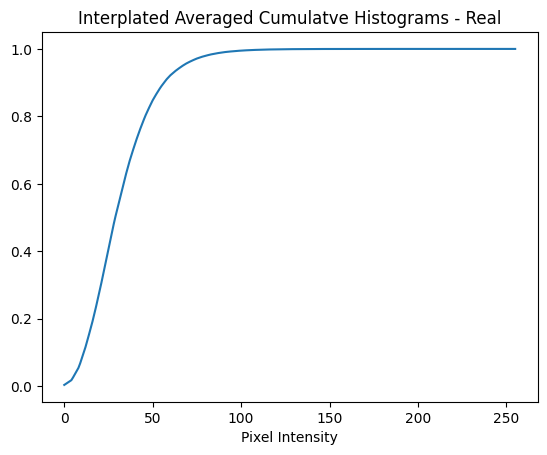

In [51]:
plt.plot(new_x_range, averaged_y_real)
plt.title('Interplated Averaged Cumulatve Histograms - Real')
plt.xlabel('Pixel Intensity')
plt.ylabel('')

fname = os.path.join(saveplots, f'InterpolatedREAL-{current_defocus}.png')

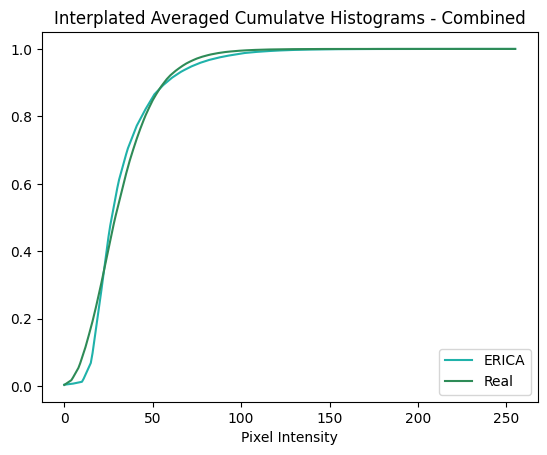

In [52]:
plt.plot(new_x_range, averaged_y, color='lightseagreen', label='ERICA')
plt.plot(new_x_range, averaged_y_real, color='seagreen', label='Real')
plt.title('Interplated Averaged Cumulatve Histograms - Combined')
plt.xlabel('Pixel Intensity')
plt.ylabel('')
plt.legend(loc="lower right")
fname = os.path.join(saveplots, f'InterpolatedCombined-{current_defocus}.png')

In [53]:
real_y_values.shape

(5, 256)

In [54]:
all_y_values.shape

(5, 256)

In [55]:
# check std 

real_std = real_y_values.std(axis=0)
erica_std = all_y_values.std(axis=0)
erica_std

array([1.57222712e-04, 2.10898089e-04, 2.65055788e-04, 3.19450595e-04,
       3.73979062e-04, 4.28590177e-04, 8.27048092e-04, 1.28004197e-03,
       1.73726421e-03, 2.19607536e-03, 2.65565202e-03, 8.82627229e-03,
       1.64291185e-02, 2.40325408e-02, 3.16361237e-02, 3.92397740e-02,
       4.97027794e-02, 6.15577408e-02, 7.35232701e-02, 8.55529874e-02,
       9.76231668e-02, 1.01696342e-01, 1.00448573e-01, 9.92317030e-02,
       9.80468815e-02, 9.68952845e-02, 9.38137100e-02, 8.87768337e-02,
       8.37404814e-02, 7.87047534e-02, 7.36697780e-02, 6.91647538e-02,
       6.54536699e-02, 6.17427229e-02, 5.80319390e-02, 5.43213517e-02,
       5.09695816e-02, 4.84546182e-02, 4.59397104e-02, 4.34248679e-02,
       4.09101027e-02, 3.85611759e-02, 3.68753885e-02, 3.51898125e-02,
       3.35044798e-02, 3.18194290e-02, 3.01536896e-02, 2.86590238e-02,
       2.71645017e-02, 2.56701486e-02, 2.41759957e-02, 2.26820826e-02,
       2.18779205e-02, 2.10738667e-02, 2.02699339e-02, 1.94661371e-02,
      

In [56]:
erica_std_err = erica_std/2
real_std_err = real_std /2
distance = np.linalg.norm(averaged_y_real-averaged_y)

In [ ]:
erica_std_err = erica_std/2
real_std_err = real_std /2
distance = np.linalg.norm(averaged_y_real-averaged_y)

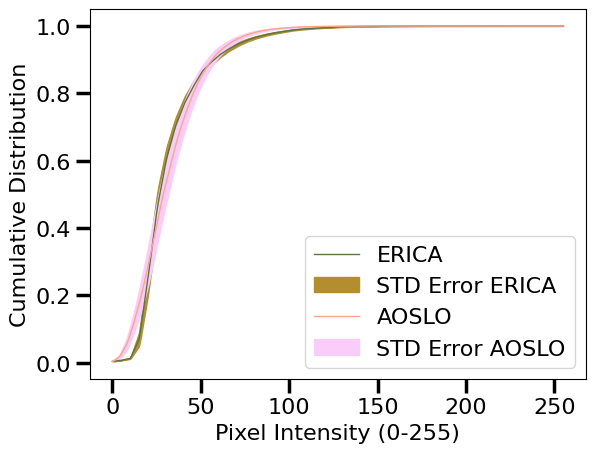

In [68]:
colours = cm.batlow(np.linspace(0.4,1,4))
plt.plot(new_x_range, averaged_y, color=colours[0], label='ERICA', linewidth=1)
plt.fill_between(new_x_range, averaged_y-erica_std_err, averaged_y+erica_std_err, color=colours[1],  label='STD Error ERICA')

plt.plot(new_x_range, averaged_y_real, color=colours[2], label='AOSLO', linewidth=1)
plt.fill_between(new_x_range, averaged_y_real-real_std_err, averaged_y_real+real_std_err, color=colours[3], label='STD Error AOSLO')
# plt.title(f'Interplated Averaged Cumulatve Histograms - Defocus {current_defocus}\n Euclidean Distance {distance}')
plt.xlabel('Pixel Intensity (0-255)',  fontsize=16)
plt.ylabel('Cumulative Distribution', fontsize=16)
plt.legend(loc="lower right", fontsize=16)
fname = os.path.join(saveplots, f'InterpolatedCombined-{current_defocus}.png')
plt.tick_params(axis='both', which='major', labelsize=16, width=2.5, length=10)
plt.savefig(fname,  bbox_inches='tight')

In [60]:
type(new_x_range)


numpy.ndarray

In [61]:
distances = np.sqrt(np.square(averaged_y - averaged_y_real))
distances

array([5.83004459e-04, 2.18210136e-03, 4.94720718e-03, 7.71231299e-03,
       1.07778573e-02, 1.85796295e-02, 2.67412677e-02, 3.48599689e-02,
       4.32590301e-02, 5.59012137e-02, 7.05534403e-02, 7.70303450e-02,
       8.18200912e-02, 8.87177037e-02, 9.62827072e-02, 1.04167015e-01,
       9.44705642e-02, 7.87681597e-02, 6.39917407e-02, 5.01700774e-02,
       3.63498403e-02, 2.17681756e-02, 7.36773691e-03, 6.98691336e-03,
       2.14189621e-02, 3.56914267e-02, 4.38271851e-02, 4.61646809e-02,
       5.08053524e-02, 5.58299173e-02, 6.26054491e-02, 6.57851617e-02,
       6.32475665e-02, 6.05769515e-02, 5.89190564e-02, 5.75725248e-02,
       5.55214295e-02, 5.05191524e-02, 4.70444224e-02, 4.39333814e-02,
       4.12277863e-02, 3.83775518e-02, 3.31657714e-02, 2.88381835e-02,
       2.48901067e-02, 2.15384882e-02, 1.84933308e-02, 1.57333226e-02,
       1.31516523e-02, 1.10301926e-02, 9.14803683e-03, 8.86049508e-03,
       5.40153842e-03, 2.48949546e-03, 4.11739777e-04, 2.63630121e-03,
      

In [62]:
average_distance = np.average(distances)
print(average_distance)

0.011574788897968619


In [63]:
test = np.sqrt((averaged_y[-1])**2 + (averaged_y_real[-1])**2)
test

1.414213562373095

In [64]:
averaged_y[-1]

0.9999999999999997

In [65]:
averaged_y_real[-1]

1.0

In [66]:
distance = np.linalg.norm(averaged_y_real-averaged_y)
distance

0.37019379785422646